# Домашнее задание №3

In [378]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [379]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [380]:
x_column_name = 'Direct_Bilirubin'
y_column_name = 'Total_Bilirubin'

d_bilirubin = data[x_column_name]
t_bilirubin = data[y_column_name]

- Проверим наши столбцы на наличие выбросов

In [381]:
d_bilirubin.describe()

count    583.000000
mean       1.486106
std        2.808498
min        0.100000
25%        0.200000
50%        0.300000
75%        1.300000
max       19.700000
Name: Direct_Bilirubin, dtype: float64

In [382]:
t_bilirubin.describe()

count    583.000000
mean       3.298799
std        6.209522
min        0.400000
25%        0.800000
50%        1.000000
75%        2.600000
max       75.000000
Name: Total_Bilirubin, dtype: float64

In [383]:
t_bilirubin[t_bilirubin > 30]

166    75.0
259    30.5
504    30.5
505    32.6
531    30.8
559    42.8
Name: Total_Bilirubin, dtype: float64

- 166 элемент выглядит как выброс и я хочу от него избавиться

In [384]:
data = data[data[y_column_name] < 75]

d_bilirubin = data[x_column_name]
t_bilirubin = data[y_column_name]

- Теперь можно построить модель и график линейной регрессии

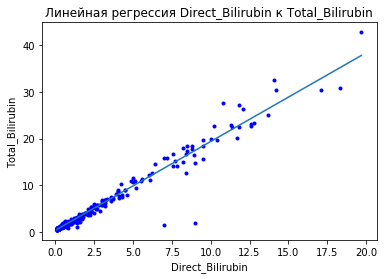

In [385]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.array(d_bilirubin).reshape(-1, 1), t_bilirubin)

x = np.linspace(min(d_bilirubin), max(d_bilirubin), 100)
y = model.coef_ * x + model.intercept_

plt.title(f'Линейная регрессия {x_column_name} к {y_column_name}')
plt.xlabel(x_column_name)
plt.ylabel(y_column_name)

plt.plot(d_bilirubin, t_bilirubin, 'b.')
plt.plot(x, y)
plt.show()

- Как видно из графика, данные сильно коррелируют друг с другом, поэтому они выглядят линейно зависимыми

- Сделаем несколько предсказаний

In [386]:
predict_test_values = np.arange(5, 16, 2)

for n, x_predict in enumerate(predict_test_values):
    print(f'#{n + 1} - val: {x_predict} => predict: {model.predict([[x_predict]])}')

#1 - val: 5 => predict: [9.86783792]
#2 - val: 7 => predict: [13.67291965]
#3 - val: 9 => predict: [17.47800139]
#4 - val: 11 => predict: [21.28308313]
#5 - val: 13 => predict: [25.08816487]
#6 - val: 15 => predict: [28.8932466]


- Отфильтруем наши данные по значениям x для предсказания

In [387]:
test_data = data[
    (data[x_column_name] > min(predict_test_values)) & (data[x_column_name] < max(predict_test_values))
]

test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 1 to 577
Data columns (total 11 columns):
Age                           45 non-null int64
Gender                        45 non-null object
Total_Bilirubin               45 non-null float64
Direct_Bilirubin              45 non-null float64
Alkaline_Phosphotase          45 non-null int64
Alamine_Aminotransferase      45 non-null int64
Aspartate_Aminotransferase    45 non-null int64
Total_Protiens                45 non-null float64
Albumin                       45 non-null float64
Albumin_and_Globulin_Ratio    45 non-null float64
Dataset                       45 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 4.2+ KB


- Получилось всего 45 значений, выведем их на экран

In [388]:
test_data[[x_column_name, y_column_name]].sort_values(by=x_column_name)

,Direct_Bilirubin,Total_Bilirubin
420,5.1,10.9
526,5.2,9.4
1,5.5,10.9
135,5.6,11.3
574,6.0,12.1
548,6.1,11.1
117,6.2,12.7
268,6.4,14.5
118,7.0,15.9
261,7.0,1.5


- Прямо скажу, данные "разъезжаются" на первый взгляд с тем, что предсказала модель и с тем, что было в таблице

In [389]:
# очищу память после выполнения задания
model = None
test_data = None
d_bilirubin = None
t_bilirubin = None

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

- Для этого построим матрицу корреляции и выберем два параметра для построения многомерной регрессии

In [390]:
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.000940,0.006714,0.080268,-0.086673,-0.019751,-0.187252,-0.265285,-0.215517,-0.136755
Total_Bilirubin,-0.000940,1.000000,0.979824,0.231588,0.248927,0.274390,-0.003320,-0.235058,-0.210539,-0.236615
Direct_Bilirubin,0.006714,0.979824,1.000000,0.234838,0.234307,0.257872,0.000199,-0.227724,-0.199017,-0.245431
Alkaline_Phosphotase,0.080268,0.231588,0.234838,1.000000,0.125754,0.167248,-0.028440,-0.165313,-0.234098,-0.184748
Alamine_Aminotransferase,-0.086673,0.248927,0.234307,0.125754,1.000000,0.791957,-0.042623,-0.030069,-0.002801,-0.163723
Aspartate_Aminotransferase,-0.019751,0.274390,0.257872,0.167248,0.791957,1.000000,-0.025716,-0.085551,-0.070402,-0.152155
Total_Protiens,-0.187252,-0.003320,0.000199,-0.028440,-0.042623,-0.025716,1.000000,0.784176,0.234652,0.034738
Albumin,-0.265285,-0.235058,-0.227724,-0.165313,-0.030069,-0.085551,0.784176,1.000000,0.689210,0.160654
Albumin_and_Globulin_Ratio,-0.215517,-0.210539,-0.199017,-0.234098,-0.002801,-0.070402,0.234652,0.689210,1.000000,0.162166
Dataset,-0.136755,-0.236615,-0.245431,-0.184748,-0.163723,-0.152155,0.034738,0.160654,0.162166,1.000000


- Из полученной матрицы корреляции я выберу столбцы Alamine_Aminotransferase и Alamine_Aminotransferase, т.к. они не так сильно коррелируют между собой и с целевым столбцом Dataset


In [391]:
x1_column_name = 'Alkaline_Phosphotase'
x2_column_name = 'Alamine_Aminotransferase'

x1 = data[x1_column_name]
x2 = data[x2_column_name]

target_column_name = 'Dataset'
target = data[target_column_name]

In [392]:
# repeated the import for clean case
from sklearn.linear_model import LinearRegression

x_model = np.array([x1, x2]).T
model = LinearRegression()
model.fit(x_model, target)

print(f'intercept: {model.intercept_}; coef: {model.coef_}')

intercept: 1.4057285585960706; coef: [-0.00031057 -0.00035359]


- Можно заметить, что переменная Dataset зависит от обоих параметров примерно одинаково

In [393]:
data_rows_count = len(data)
test_rows_indexes = list(map(lambda _: np.random.randint(data_rows_count), range(5)))

print(f'Номера тестовых рядов: {test_rows_indexes}')

Номера тестовых рядов: [480, 271, 62, 301, 274]


In [394]:
test_data = data.iloc[test_rows_indexes][[x1_column_name, x2_column_name, target_column_name]]
test_data

,Alkaline_Phosphotase,Alamine_Aminotransferase,Dataset
481,282,132,1
272,380,390,1
62,158,37,1
302,430,28,1
275,180,22,2


In [395]:
model.predict(
  np.array(test_data[[x1_column_name, x2_column_name]])
)

array([1.27147357, 1.14981202, 1.34357535, 1.26228184, 1.34204655])

- Если честно, то я затрудняюсь сделать вывод из полученных данных, т.к. они все выглядят очень похожими, но целевой столбец разный в примере... Код перепроверял несколько раз и не нашёл ошибку

In [396]:
x1 = None
x2 = None
target = None
model = None
test_data = None

Посчитать квартили для всех колонок. 

In [397]:
quartile_data = data.drop('Gender', axis=1)

for column in quartile_data.columns:
    quartile = quartile_data[column].quantile([0.25, 0.50, 0.75])
    print(f'column: {column}')
    print(f'quartile: \n{quartile}')
    print()


column: Age
quartile: 
0.25    33.0
0.50    45.0
0.75    58.0
Name: Age, dtype: float64

column: Total_Bilirubin
quartile: 
0.25    0.8
0.50    1.0
0.75    2.6
Name: Total_Bilirubin, dtype: float64

column: Direct_Bilirubin
quartile: 
0.25    0.2
0.50    0.3
0.75    1.3
Name: Direct_Bilirubin, dtype: float64

column: Alkaline_Phosphotase
quartile: 
0.25    175.25
0.50    208.00
0.75    298.00
Name: Alkaline_Phosphotase, dtype: float64

column: Alamine_Aminotransferase
quartile: 
0.25    23.00
0.50    35.00
0.75    60.75
Name: Alamine_Aminotransferase, dtype: float64

column: Aspartate_Aminotransferase
quartile: 
0.25    25.0
0.50    42.0
0.75    87.0
Name: Aspartate_Aminotransferase, dtype: float64

column: Total_Protiens
quartile: 
0.25    5.8
0.50    6.6
0.75    7.2
Name: Total_Protiens, dtype: float64

column: Albumin
quartile: 
0.25    2.6
0.50    3.1
0.75    3.8
Name: Albumin, dtype: float64

column: Albumin_and_Globulin_Ratio
quartile: 
0.25    0.70
0.50    0.94
0.75    1.10
Name

In [399]:
quartile_data = None

Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [412]:
data_less_50 = data[data['Age'] <= 50]
data_more_50 = data[data['Age'] > 50]

data['Dataset'].unique()

array([1, 2], dtype=int64)

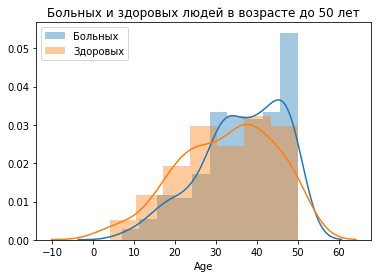

In [413]:
sns.distplot(data_less_50[data_less_50['Dataset'] == 1]['Age'])
sns.distplot(data_less_50[data_less_50['Dataset'] == 2]['Age'])

plt.title('Больных и здоровых людей в возрасте до 50 лет')
plt.legend(['Больных', 'Здоровых'])

plt.show()

In [434]:
print(f'Среднее значение в выборке людей младше 50 лет: {data_less_50["Age"].mean()}')
print(f'Квантиль 0.5 в выборке людей младше 50 лет: {data_less_50["Age"].quantile(0.5)}')

Среднее значение в выборке людей младше 50 лет: 35.148936170212764
Квантиль 0.5 в выборке людей младше 50 лет: 36.0


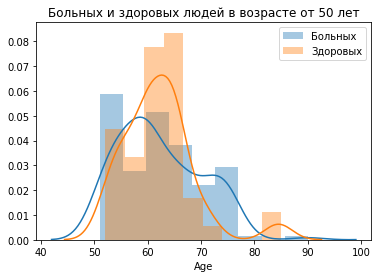

In [435]:
sns.distplot(data_more_50[data_more_50['Dataset'] == 1]['Age'])
sns.distplot(data_more_50[data_more_50['Dataset'] == 2]['Age'])

plt.title('Больных и здоровых людей в возрасте от 50 лет')
plt.legend(['Больных', 'Здоровых'])

plt.show()

In [437]:
print(f'Среднее значение в выборке людей старше 50 лет: {data_more_50["Age"].mean()}')
print(f'Квантиль 0.5 в выборке людей старше 50 лет: {data_more_50["Age"].quantile(0.5)}')

Среднее значение в выборке людей старше 50 лет: 62.213592233009706
Квантиль 0.5 в выборке людей старше 50 лет: 60.0


- среднее значение и квантиль отличаются в обеих выборках
- в выборке ДО 50 лет среднее значение ниже, чем квантиль
- в выборке ОТ 50 лет среднее значение выше, чем квантиль

  - какой вывод от этого - я затрудняюсь придумать...

In [448]:
data_less_50 = None
data_more_50 = None


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [449]:
stats.ttest_1samp(
    data[data['Dataset'] == 1]['Total_Bilirubin'],
    data['Total_Bilirubin'].mean()
)

Ttest_1sampResult(statistic=2.668022710113231, pvalue=0.007929471185804672)

- в данном одновыборочном критерии мы не принимаем нулевую гипотезу, т.к. pvalue составляет лишь ~0.8%, что говорит о том, что Общий билирубин влияет на появление заболевания печени у человека

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [468]:
stats.ttest_ind(
    data[data['Dataset'] == 1]['Total_Bilirubin'],
    data[data['Dataset'] == 2]['Total_Bilirubin'],
)

Ttest_indResult(statistic=5.8649857449009275, pvalue=7.548849823227222e-09)

- в этом исследовании мы подтверждаем предыдущее наше заключение и можем смело утверждать, что Общий билирубин - явный признак заболевания печени, т.к. pvalue в двойной выборке ~0%

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [469]:
group_1 = data[data['Age'] < 30]['Dataset']
group_2 = data[(data['Age'] >= 30) & (data['Age'] <= 55)]['Dataset']
group_3 = data[data['Age'] > 55]['Dataset']

stats.f_oneway(group_1, group_2, group_3)

F_onewayResult(statistic=9.374152826309006, pvalue=9.848742562445969e-05)

- Проверим наше заключение

In [473]:
print(f'group 1 count: {len(group_1)}; mean: {group_1.mean()}')
print(f'group 2 count: {len(group_2)}; mean: {group_2.mean()}')
print(f'group 3 count: {len(group_3)}; mean: {group_3.mean()}')

group 1 count: 105; mean: 1.457142857142857
group 2 count: 319; mean: 1.244514106583072
group 3 count: 158; mean: 1.259493670886076


- Учитывая последние показатели, среднее кол-во больных не сильно отличается во всех группах, за исключением 1 группы, где находятся люди до 30. Это обозначает, что вероятность зависимости возникновения заболевания от возраста крайне маловероятна

Вопросы задавать на почту yustiks@gmail.com